In [1]:
import pandas as pd

In [2]:
caminho_arquivo = 'Data_IGD_VIS.csv'

In [3]:
#decodificando o arquivo
try:
    # Tenta abrir com ',' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ",", encoding='UTF-8')
except pd.errors.ParserError:
    # Se ocorrer um erro, tente abrir com ';' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ";", encoding='UTF8')

In [4]:
pd_igd_vis.head()

,Código,Unidade Territorial,UF,Referência,TAFE - Taxa de Acompanhamento de Frequência Escolar,TAAS - Taxa de Acompanhamene Agenda de Saúde,TAC - Taxa de Atualização Cadastral,Fator 1: Operação ( (TAFE+TAAS) / 2 + TAC / 2)
0,120001,ACRELÂNDIA,AC,jul/23,"67,55","94,46","83,01",82
1,120005,ASSIS BRASIL,AC,jul/23,"62,2","74,33","89,93","79,09"
2,120010,BRASILÉIA,AC,jul/23,"55,69","84,09","85,07","77,48"
3,120013,BUJARI,AC,jul/23,"73,72","83,85","92,11","85,44"
4,120017,CAPIXABA,AC,jul/23,"72,2","80,24","88,61","82,41"


In [5]:
pd_igd_vis.info

<bound method DataFrame.info of       Código Unidade Territorial  UF Referência  \
0     120001          ACRELÂNDIA  AC     jul/23   
1     120005        ASSIS BRASIL  AC     jul/23   
2     120010           BRASILÉIA  AC     jul/23   
3     120013              BUJARI  AC     jul/23   
4     120017            CAPIXABA  AC     jul/23   
...      ...                 ...  ..        ...   
5565  172120      TOCANTINÓPOLIS  TO     jul/23   
5566  172125            TUPIRAMA  TO     jul/23   
5567  172130          TUPIRATINS  TO     jul/23   
5568  172208        WANDERLÂNDIA  TO     jul/23   
5569  172210             XAMBIOÁ  TO     jul/23   

     TAFE - Taxa de Acompanhamento de Frequência Escolar  \
0                                                 67,55    
1                                                  62,2    
2                                                 55,69    
3                                                 73,72    
4                                                  72,2

In [6]:
pd_igd_vis.tail()

,Código,Unidade Territorial,UF,Referência,TAFE - Taxa de Acompanhamento de Frequência Escolar,TAAS - Taxa de Acompanhamene Agenda de Saúde,TAC - Taxa de Atualização Cadastral,Fator 1: Operação ( (TAFE+TAAS) / 2 + TAC / 2)
5565,172120,TOCANTINÓPOLIS,TO,jul/23,"88,01","88,8","84,26","86,33"
5566,172125,TUPIRAMA,TO,jul/23,"71,34","89,88","82,82","81,71"
5567,172130,TUPIRATINS,TO,jul/23,"88,62","70,32","67,06","73,26"
5568,172208,WANDERLÂNDIA,TO,jul/23,"69,51","83,78","83,68","80,16"
5569,172210,XAMBIOÁ,TO,jul/23,"69,38","78,64","85,08","79,54"


In [7]:
pd_igd_vis.describe()

,Código
count,5570.000000
mean,325358.627828
std,98491.033878
min,110001.000000
25%,251212.500000
50%,314627.500000
75%,411918.750000
max,530010.000000


In [8]:
# removendo colunas que não preciso
remover_colunas = ['TAFE - Taxa de Acompanhamento de Frequência Escolar' , 'TAAS - Taxa de Acompanhamene Agenda de Saúde' , 'TAC - Taxa de Atualização Cadastral']
df_igd = pd_igd_vis.drop(remover_colunas, axis = 1)

In [9]:
#renomeando colunas
df_igd = df_igd.rename(columns={'Código': 'ibge_6', 'Unidade Territorial': 'municipio' , 'Referência' : 'ano_mês' , 'Fator 1: Operação (  (TAFE+TAAS) / 2 +  TAC / 2)': 'igd_m'} )

In [10]:
#convertendo a coluna igd_m em numeric
df_igd['igd_m'] = pd.to_numeric(df_igd['igd_m'].str.replace(',', '.', regex=True), errors='coerce')

In [11]:
df_igd

,ibge_6,municipio,UF,ano_mês,igd_m
0,120001,ACRELÂNDIA,AC,jul/23,82.00
1,120005,ASSIS BRASIL,AC,jul/23,79.09
2,120010,BRASILÉIA,AC,jul/23,77.48
3,120013,BUJARI,AC,jul/23,85.44
4,120017,CAPIXABA,AC,jul/23,82.41
...,...,...,...,...,...
5565,172120,TOCANTINÓPOLIS,TO,jul/23,86.33
5566,172125,TUPIRAMA,TO,jul/23,81.71
5567,172130,TUPIRATINS,TO,jul/23,73.26
5568,172208,WANDERLÂNDIA,TO,jul/23,80.16


In [12]:
df_igd.describe()

,ibge_6,igd_m
count,5570.000000,5543.000000
mean,325358.627828,83.964393
std,98491.033878,5.510169
min,110001.000000,58.670000
25%,251212.500000,80.640000
50%,314627.500000,84.540000
75%,411918.750000,87.900000
max,530010.000000,99.200000


In [13]:
# Ordenando o DataFrame pelo valor do IGD em ordem crescente
df_igd = df_igd.sort_values(by='igd_m', ascending=False)

# Criar uma nova coluna chamada 'Ranking' com o ranking do IGD-M
df_igd['Ranking'] = df_igd['igd_m'].rank(ascending=False, method='first')

# Exibir o DataFrame
print(df_igd)

      ibge_6             municipio  UF ano_mês  igd_m  Ranking
5210  353770               PIACATU  SP  jul/23  99.20      1.0
4406  432330           VILA FLORES  RS  jul/23  99.13      2.0
4231  431445                PINHAL  RS  jul/23  98.32      3.0
5039  352215                ITAOCA  SP  jul/23  97.92      4.0
3435  411729        NOVO ITACOLOMI  PR  jul/23  97.67      5.0
...      ...                   ...  ..     ...    ...      ...
4581  421110         MONTE CASTELO  SC  jul/23    NaN      NaN
4933  351330              CRUZÁLIA  SP  jul/23    NaN      NaN
5108  352870       MARABÁ PAULISTA  SP  jul/23    NaN      NaN
5258  354210                RAFARD  SP  jul/23    NaN      NaN
5424  355690  VISTA ALEGRE DO ALTO  SP  jul/23    NaN      NaN

[5570 rows x 6 columns]


In [14]:
#tranformando os valores nulos em zero
df_igd ['igd_m'] = df_igd ['igd_m']. fillna(0)

In [15]:
df_igd.tail()

,ibge_6,municipio,UF,ano_mês,igd_m,Ranking
4581,421110,MONTE CASTELO,SC,jul/23,0.0,NaN
4933,351330,CRUZÁLIA,SP,jul/23,0.0,NaN
5108,352870,MARABÁ PAULISTA,SP,jul/23,0.0,NaN
5258,354210,RAFARD,SP,jul/23,0.0,NaN
5424,355690,VISTA ALEGRE DO ALTO,SP,jul/23,0.0,NaN


In [16]:
#Vou visualizar novamente meus dados para entender de que forma eu posso agrupá-los
df_igd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 5210 to 5424
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ibge_6     5570 non-null   int64  
 1   municipio  5570 non-null   object 
 2   UF         5570 non-null   object 
 3   ano_mês    5570 non-null   object 
 4   igd_m      5570 non-null   float64
 5   Ranking    5543 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 304.6+ KB


In [17]:
# verificando quantas linhas temos com valor zero e quais municípios são
contagem_zeros = (df_igd['igd_m'] == 0).sum()

print("Número de linhas com valor zero na coluna: ", contagem_zeros)

linhas_com_zero = df_igd.loc[df_igd['igd_m'] == 0]

print(linhas_com_zero)

Número de linhas com valor zero na coluna:  27
      ibge_6              municipio  UF ano_mês  igd_m  Ranking
144   130130                CODAJÁS  AM  jul/23    0.0      NaN
154   130200             ITAPIRANGA  AM  jul/23    0.0      NaN
228   290220                ARAMARI  BA  jul/23    0.0      NaN
303   290830   CONCEIÇÃO DO ALMEIDA  BA  jul/23    0.0      NaN
306   290860                  CONDE  BA  jul/23    0.0      NaN
359   291310                IBITITÁ  BA  jul/23    0.0      NaN
423   291860               JUSSIAPE  BA  jul/23    0.0      NaN
574   293030          SERRA DOURADA  BA  jul/23    0.0      NaN
2432  150110                  BAGRE  PA  jul/23    0.0      NaN
2434  150125                BANNACH  PA  jul/23    0.0      NaN
2540  150746      SÃO JOÃO DA PONTA  PA  jul/23    0.0      NaN
3742  240520                JANDUÍS  RN  jul/23    0.0      NaN
3941  430107        ARROIO DO PADRE  RS  jul/23    0.0      NaN
4037  430593          CORONEL PILAR  RS  jul/23    0.0   

In [18]:
#criando um gráfico de barras com os dez munícipios com menor IGD-M

import matplotlib.pyplot as plt

# Ordeando os valores de 'igd_m' em ordem decrescente para os 10 municipios com menor taxa
top_10_municipios_menor = df_igd.sort_values(by='igd_m', ascending=True).head(10)

In [19]:
#nenhum munícipio tem igd_m, então o grafico fica vazio
top_10_municipios_menor

,ibge_6,municipio,UF,ano_mês,igd_m,Ranking
5424,355690,VISTA ALEGRE DO ALTO,SP,jul/23,0.0,NaN
144,130130,CODAJÁS,AM,jul/23,0.0,NaN
154,130200,ITAPIRANGA,AM,jul/23,0.0,NaN
228,290220,ARAMARI,BA,jul/23,0.0,NaN
303,290830,CONCEIÇÃO DO ALMEIDA,BA,jul/23,0.0,NaN
306,290860,CONDE,BA,jul/23,0.0,NaN
359,291310,IBITITÁ,BA,jul/23,0.0,NaN
423,291860,JUSSIAPE,BA,jul/23,0.0,NaN
574,293030,SERRA DOURADA,BA,jul/23,0.0,NaN
2432,150110,BAGRE,PA,jul/23,0.0,NaN


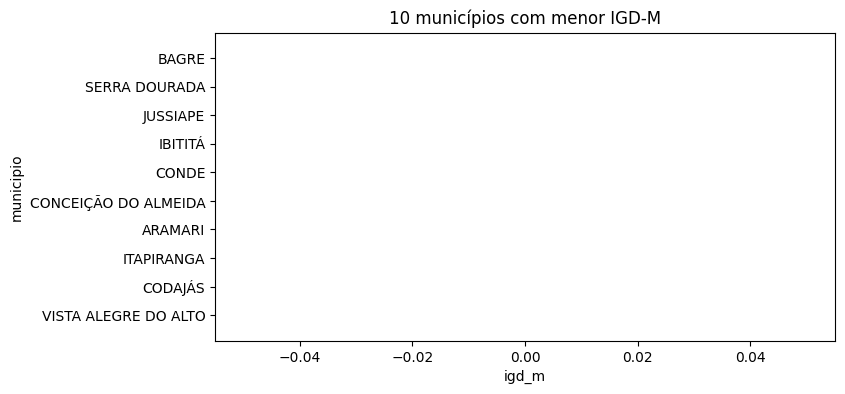

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_menor['municipio'], top_10_municipios_menor['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com menor IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

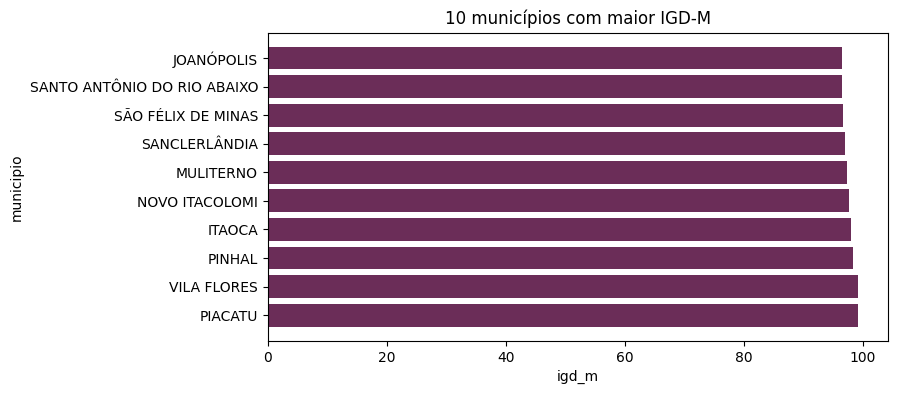

In [21]:
#Agora a mesma coisa para os dez municípios com as maiores taxas de IGD-M
top_10_municipios_maior = df_igd.sort_values(by='igd_m', ascending=False).head(10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_maior['municipio'], top_10_municipios_maior['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com maior IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

In [28]:
bins = [-1, 1, 70, 75, 80, 85, 90, 95, 100]

# Defina os rótulos dos intervalos
labels = ['0' ,'0-70', '70-75', '75-80', '80-85', '85-90','90-95', '95-100']

# Converter a coluna 'igd_m' para o tipo float
df_igd['igd_m'] = df_igd['igd_m'].astype(float)

# Crie uma nova coluna 'Intervalo' com base nos rótulos
df_igd['Intervalo'] = pd.cut(df_igd['igd_m'], bins=bins, labels=labels)

# Use groupby para contar os municípios em cada intervalo
contagem_municipios = df_igd.groupby('Intervalo')['municipio'].count().reset_index()

# Renomeie a coluna de contagem
contagem_municipios = contagem_municipios.rename(columns={'municipio': 'Número de Municípios'})

# Exiba o DataFrame com o número de municípios em cada intervalo
print(contagem_municipios)


  Intervalo  Número de Municípios
0         0                    27
1      0-70                    87
2     70-75                   273
3     75-80                   852
4     80-85                  1737
5     85-90                  1896
6     90-95                   662
7    95-100                    36


C:\Users\sesup\AppData\Local\Temp\ipykernel_24308\3158894679.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_municipios = df_igd.groupby('Intervalo')['municipio'].count().reset_index()


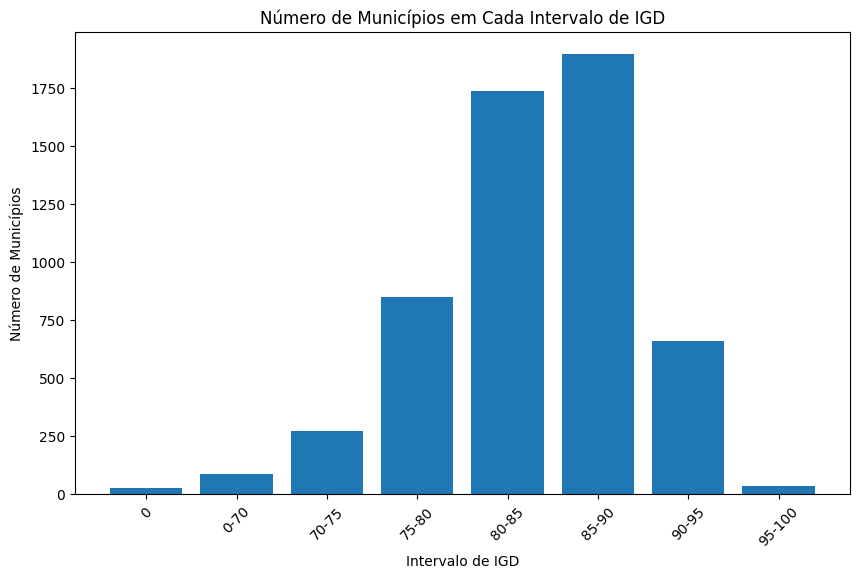

In [29]:
# Crie um gráfico de barras para visualizar os resultados
plt.figure(figsize=(10, 6))
plt.bar(contagem_municipios['Intervalo'], contagem_municipios['Número de Municípios'])
plt.title('Número de Municípios em Cada Intervalo de IGD')
plt.xlabel('Intervalo de IGD')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.show()

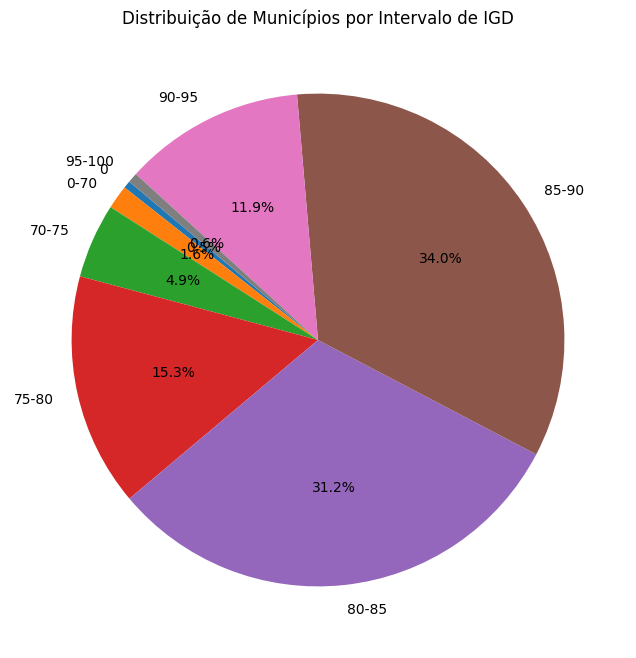

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(contagem_municipios['Número de Municípios'], labels=contagem_municipios['Intervalo'], autopct='%1.1f%%', startangle=140)

# Defina o título do gráfico
plt.title('Distribuição de Municípios por Intervalo de IGD')

# Mostre o gráfico
plt.show()

In [38]:
 mapeamento = {
    '0': 0,
    '0-70': 1,
    '70-75': 2,
    '75-80': 3,
    '80-85': 4,
    '85-90': 5,
    '90-95': 6,
    '95-100': 7
}

# Crie a coluna 'nota do municipio' com base nos rótulos
df_igd['nota do municipio'] = df_igd['Intervalo'].map(mapeamento)

# Exiba o DataFrame com a nova coluna
print(df_igd)






      ibge_6             municipio  UF ano_mês  igd_m  Ranking Intervalo  \
5210  353770               PIACATU  SP  jul/23  99.20      1.0    95-100   
4406  432330           VILA FLORES  RS  jul/23  99.13      2.0    95-100   
4231  431445                PINHAL  RS  jul/23  98.32      3.0    95-100   
5039  352215                ITAOCA  SP  jul/23  97.92      4.0    95-100   
3435  411729        NOVO ITACOLOMI  PR  jul/23  97.67      5.0    95-100   
...      ...                   ...  ..     ...    ...      ...       ...   
4581  421110         MONTE CASTELO  SC  jul/23   0.00      NaN         0   
4933  351330              CRUZÁLIA  SP  jul/23   0.00      NaN         0   
5108  352870       MARABÁ PAULISTA  SP  jul/23   0.00      NaN         0   
5258  354210                RAFARD  SP  jul/23   0.00      NaN         0   
5424  355690  VISTA ALEGRE DO ALTO  SP  jul/23   0.00      NaN         0   

     nota do municipio  
5210                 7  
4406                 7  
4231        

In [39]:
df_igd

,ibge_6,municipio,UF,ano_mês,igd_m,Ranking,Intervalo,nota do municipio
5210,353770,PIACATU,SP,jul/23,99.20,1.0,95-100,7
4406,432330,VILA FLORES,RS,jul/23,99.13,2.0,95-100,7
4231,431445,PINHAL,RS,jul/23,98.32,3.0,95-100,7
5039,352215,ITAOCA,SP,jul/23,97.92,4.0,95-100,7
3435,411729,NOVO ITACOLOMI,PR,jul/23,97.67,5.0,95-100,7
...,...,...,...,...,...,...,...,...
4581,421110,MONTE CASTELO,SC,jul/23,0.00,NaN,0,0
4933,351330,CRUZÁLIA,SP,jul/23,0.00,NaN,0,0
5108,352870,MARABÁ PAULISTA,SP,jul/23,0.00,NaN,0,0
5258,354210,RAFARD,SP,jul/23,0.00,NaN,0,0


In [40]:
contagem_zeros = df_igd['nota do municipio'].value_counts()

# Exiba a contagem de valores zero
quantidade_zeros = contagem_zeros.get(0, 0)  # Obtém a contagem de zeros, se existirem, caso contrário, retorna 0

print("Quantidade de valores zero:", quantidade_zeros)

Quantidade de valores zero: 27
